In [ ]:
import sys
import os
import matplotlib.pyplot as plt

# Add the src directory to the path. TEMPORARY FIX
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../..")))

from models.unet.unet import UNet
from src.models.data_management.cnn_formes import CNNFormes
from src.data_processing.dataset_loader import CoastData
from src.models.data_management.data_loader import DataLoaderManager

import cv2

c:\Users\josep\.conda\envs\imagine\Lib\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
# Load the data to split it and save it to a dict
path = os.path.abspath(os.path.join(os.getcwd(), "../../../data/patchify_shoreline/"))
# data = CoastData(data_path=path)

# data_split = data.split_data()

In [4]:
unet = UNet(num_classes=1, experiment_name="test_experiments", use_mlflow=True)

In [5]:
# Load the data to the model
data = unet.load_data(path, CNNFormes)

In [6]:
# Total non-shoreline pixels:  1155193552
# Total shoreline pixels:  4269360
# Total pixels:  1159462912
# Shoreline percentage:  0.3682187636890968

total_pixels = 1159462912
shoreline_pixels = 4269360

# Calculate the class weight
weight = total_pixels / shoreline_pixels

print(weight)

271.577686585343


In [ ]:
artifact_path = os.path.abspath(os.path.join(path, "../../artifacts/"))
print(artifact_path)
# Train the model
unet.train(epochs=100, loss_function_name="BCEWithLogitsLoss", weight=weight, artifact_path=artifact_path, run_name = "binary_unet")

c:\Users\josep\Documents\SOCIB\Shoreline-extraction\artifacts
Creating folders for the artifacts at c:\Users\josep\Documents\SOCIB\Shoreline-extraction\artifacts\2025-05-06-11-26-35_binary_unet
Model moved to cuda
Epoch 1/100
train metrics: 
	train_loss: 0.804059901122124
	train_accuracy: 0.7887968420982361
	train_f1_score: 0.02874627523124218
	train_precision: 0.014620288275182247
	train_recall: 0.8503134250640869
	train_confusion_matrix: 
		0.7886 0.2114
		0.1497 0.8503

validation metrics: 
	validation_loss: 0.6697355346981756
	validation_accuracy: 0.8647251129150391
	validation_f1_score: 0.04407099634408951
	validation_precision: 0.022624684497714043
	validation_recall: 0.8461692333221436
	validation_confusion_matrix: 
		0.8648 0.1352
		0.1538 0.8462

Validation loss improved from inf to 0.669736. Saving the model. Early stopping counter: 0/25
Epoch 2/100
train metrics: 
	train_loss: 0.6159255743026734
	train_accuracy: 0.8309935331344604
	train_f1_score: 0.038282688707113266
	train

# Predictions

In [ ]:
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../../data/processed_shoreline/"))
coast_data = CoastData(data_path)
split = coast_data.split_data()

data = DataLoaderManager.load_data(split)

CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57


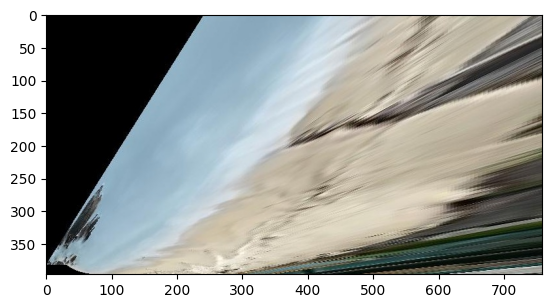

c:\Users\josep\Documents\SOCIB\Shoreline-extraction\data\processed_shoreline\images\1603883400.Wed.Oct.28_12_10_00.CET.2020.agrelo.image.jpg
(array([0, 1], dtype=uint8), array([300438,    885]))
(array([0., 1.], dtype=float32), array([285094,  16229]))


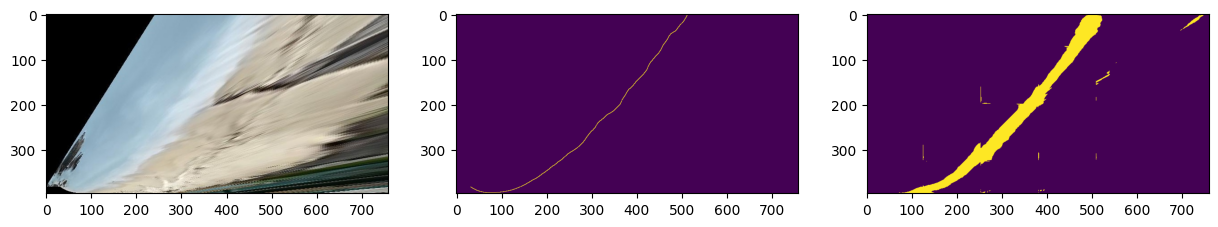

In [ ]:
import numpy as np
index = 1
img_path = data["test"]['images'][index]
mask_path = data["test"]['masks'][index]

unet = UNet(num_classes=1, experiment_name="test_experiments", use_mlflow=False)

artifact_path = os.path.abspath(os.path.join(os.getcwd(), "../../../artifacts/"))
unet.load_model(os.path.abspath(os.path.join(artifact_path, "2025-05-06-11-26-35_binary_unet/models/best_model.pth")))

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img)
plt.show()
print(img_path)
# pred = unet.predict(img_path)
pred = unet.predict_patch(img_path, combination="max", binary_threshold=0.75)


print(np.unique(mask, return_counts=True))
print(np.unique(pred.cpu(), return_counts=True))


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img)
ax[1].imshow(mask)
ax[2].imshow(pred.cpu().squeeze())

plt.show()

# DiceLoss

In [ ]:
# Load the data to split it and save it to a dict
path = os.path.abspath(os.path.join(os.getcwd(), "../../../data/patchify_shoreline/"))

In [ ]:
unet = UNet(num_classes=1, experiment_name="test_experiments", use_mlflow=True)
# Load the data to the model
data = unet.load_data(path, CNNFormes)

In [ ]:
artifact_path = os.path.abspath(os.path.join(path, "../../artifacts/"))

# Train the model without weight
unet.train(epochs=50, loss_function_name="DiceLoss", weight=None, artifact_path=artifact_path)

Creating folders for the artifacts at /srv/Shoreline-extraction/artifacts/2025-02-18-15-57-57
Epoch 1/50
	train_accuracy: 0.95684308
	train_f1: 0.02132904
	train_precision: 0.01163543
	train_recall: 0.12780474
	train_confusion_matrix: tensor([[0.9599, 0.0401],
        [0.8722, 0.1278]])
	train_loss: 0.9684708862150869

	validation_accuracy: 0.9919585
	validation_f1: 0.03591026
	validation_precision: 0.03219223
	validation_recall: 0.04059925
	validation_confusion_matrix: tensor([[0.9955, 0.0045],
        [0.9594, 0.0406]])
	validation_loss: 0.9694920648816484

Epoch 2/50
	train_accuracy: 0.97372246
	train_f1: 0.03088743
	train_precision: 0.01786854
	train_recall: 0.11380495
	train_confusion_matrix: tensor([[0.9769, 0.0231],
        [0.8862, 0.1138]])
	train_loss: 0.9483912859809014

	validation_accuracy: 0.99061203
	validation_f1: 0.05595618
	validation_precision: 0.04447563
	validation_recall: 0.075426
	validation_confusion_matrix: tensor([[0.9940, 0.0060],
        [0.9246, 0.0754]])
	

## Training with weights and DiceLoss

We need values between 0 and 1, so:
$$
w_{shoreline} = \frac{\text{Total non-shoreline pixels}}{\text{Total pixels}}
$$

$$
w_{non-shoreline} = \frac{\text{Total shoreline pixels}}{\text{Total pixels}}
$$

And we obtain:

$$
w_{shoreline} = \frac{1155193552}{1159462912} \approx 0.9963
$$

$$
w_{non-shoreline} = \frac{4269360}{1159462912} \approx 0.0037
$$

So, we will set a weight of 0.9963 to the positive class.

In [2]:
# Total non-shoreline pixels:  1155193552
# Total shoreline pixels:  4269360
# Total pixels:  1159462912
# Shoreline percentage:  0.3682187636890968
non_shoreline_pixels = 1155193552
total_pixels = 1159462912
weight = non_shoreline_pixels / total_pixels

print(weight)

0.996317812363109


In [ ]:
# Load the data to split it and save it to a dict
path = os.path.abspath(os.path.join(os.getcwd(), "../../../data/patchify_shoreline/"))

unet = UNet(num_classes=1, experiment_name="test_experiments", use_mlflow=True)
# Load the data to the model
data = unet.load_data(path, CNNFormes)

In [ ]:
artifact_path = os.path.abspath(os.path.join(path, "../../artifacts/"))

# Train the model without weight
unet.train(epochs=50, loss_function_name="DiceLoss", weight=weight, artifact_path=artifact_path)

Creating folders for the artifacts at /srv/Shoreline-extraction/artifacts/2025-02-19-10-28-14
Epoch 1/50
	train_accuracy: 0.96384919
	train_f1: 0.03780825
	train_precision: 0.0209566
	train_recall: 0.19301903
	train_confusion_matrix: tensor([[0.9667, 0.0333],
        [0.8070, 0.1930]])
	train_loss: 0.006938070726370619

	validation_accuracy: 0.98731679
	validation_f1: 0.07571085
	validation_precision: 0.05177278
	validation_recall: 0.14082274
	validation_confusion_matrix: tensor([[0.9905, 0.0095],
        [0.8592, 0.1408]])
	validation_loss: 0.006965819579797768

Validation loss improved from inf to 0.006966. Saving the model. Early stopping counter: 0/25
Epoch 2/50
